<a href="https://colab.research.google.com/github/kartik2627/RNN------AI/blob/main/long_short_term_memory_GOOGLE_STOCK_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#inserting the training data set
data_train = pd.read_csv('/content/drive/MyDrive/Untitled form (File responses) (1)/python Datasets/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')

In [3]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_data_set = data_train.iloc[:,1:2].values
training_data_set.shape

(1258, 1)

In [7]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_data_set_scaled = sc.fit_transform(training_data_set)

In [8]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_data_set_scaled[i-60:i,0])
  y_train.append(training_data_set_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train.shape


(1198, 60)

In [10]:
y_train.shape

(1198,)

In [14]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
x_train.shape

(1198, 60, 1)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
regressor = Sequential()


In [19]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [21]:
regressor.add(Dense(units = 1))


In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [24]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - loss: 0.1176
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0065
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0065
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0049
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0044
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - loss: 0.0044
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0051
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - loss: 0.0052
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0042
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - loss: 0.0036
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0036
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8

In [26]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Untitled form (File responses) (1)/python Datasets/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')

In [27]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [30]:
dataset_total = pd.concat((data_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


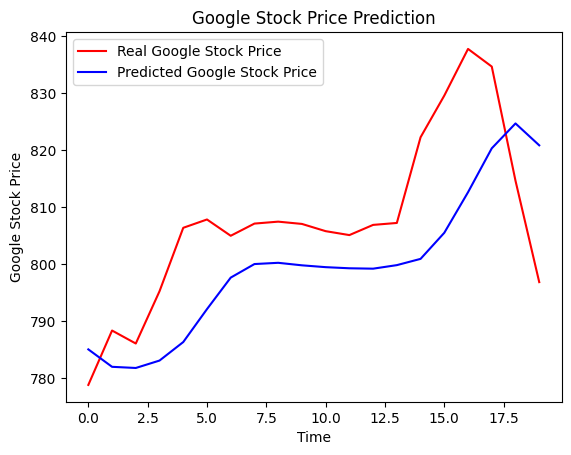

In [31]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()